In [ ]:
#Data Collection
import pandas_datareader as pdr #pandas_datareader is a Python library that simplifies the process of accessing and retrieving financial data from various online sources.


In [ ]:
pip install --upgrade pandas pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 32.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
pip install pandas==1.3.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.18.0 requires pandas>=1.5.0, but you have pandas 1.3.3 which is incompatible.
bigframes 1.15.0 requires pandas>=1.5.0, but you have pandas 1.3.3 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.3 which is incompatible.
geopandas 0.14.4 requires pandas>=1.4.0, but you have pandas 1.3.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.3.3 which is incompatible.
mizani 0.9.3 requires pandas>=1.3.5, but you have pandas 1.3.3 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you hav

In [ ]:
import pandas_datareader as pdr

df = pdr.get_data_tiingo('GOOG', api_key='9fc1177d60e08cfe92dc467656690883e07f78ca')


/usr/local/lib/python3.10/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df1= df.reset_index()['close']

In [ ]:
df1.shape

In [ ]:
df1

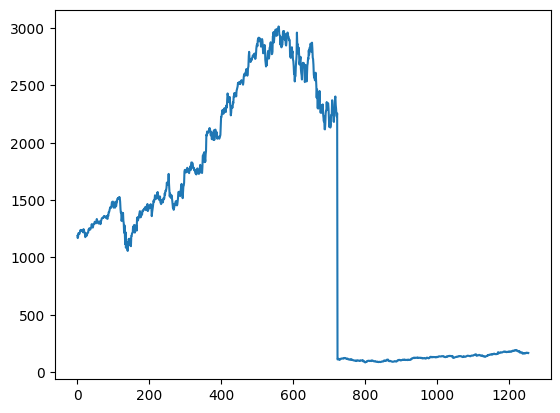

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1) #This line creates a line plot using the data from df1.


In [ ]:
#LSTM are sensitive to the scale of the data. So we will use MinMax Scaler(Where we will transforming our data from 0 to 1)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) #This means that the scaler will transform the data to fit within the range [0, 1]
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) #reshape(-1, 1) converts a 1D array into a 2D array with one column, automatically adjusting the number of rows, making it suitable for operations that need 2D input.

#After transforming the value we can see now our data is in a array shape of value 0 to 1

In [ ]:
df1

In [ ]:
#Splitting dataset into Train Test split
training_size=int(len(df1)*0.65) #Calculates the number of data points to be used for training
test_size=len(df1)-training_size #Calculates the number of data points to be used for testing
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
#df1[0:training_size, :]: Selects rows from the start (0) up to training_size for training data. : indicates all columns are included.
#df1[training_size:len(df1), :1]: Selects rows from training_size to the end for test data. :1 selects only the first column


In [ ]:
training_size,test_size

In [ ]:
train_data

In [ ]:
import numpy #for numerical computations and handling arrays in Python
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1): # create_dataset that converts a given array (time series data) into a dataset matrix suitable for machine learning. dataset: The input array of values, typically a time series. time_step=1: The number of previous time steps to consider as input features. This is set to 1 by default but can be adjusted.
	dataX, dataY = [], [] # Initializes two empty lists,which will store the input sequences (features) and corresponding output values (labels) respectively
	for i in range(len(dataset)-time_step-1): #Loops through the dataset to create sequences of data. The loop runs from index 0 to len(dataset) - time_step - 1, ensuring that each sequence has the required time_step length without going out of bounds
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 Extracts a sequence of data points from the dataset. Slices the dataset from the current index i to i + time_step. The , 0 ensures that only the first column is selected, assuming dataset is a 2D array where each row has multiple features
		dataX.append(a) #This list will eventually contain all the sequences of features (input data) used for training.
		dataY.append(dataset[i + time_step, 0]) #This represents the corresponding target value (output) that the model should predict after seeing the sequence in dataX
	return numpy.array(dataX), numpy.array(dataY) #Converts the dataX and dataY lists into NumPy arrays and returns them

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #the model will look at the previous 100 data points to make a prediction
X_train, y_train = create_dataset(train_data, time_step) #Creates sequences of 100 time steps as inputs (X_train) and the value at t+1 as the output (y_train) from the training data.
X_test, ytest = create_dataset(test_data, time_step) #Does the same for the test data, producing X_test and ytest.

In [ ]:
print(X_train.shape) #Displays the number of sequences and the length of each sequence in the training data.
print(y_train.shape) #Displays the number of target values (one for each sequence) in the training data.


(715, 100)
(715,)


In [ ]:
print(X_test.shape), print(ytest.shape)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) #reshape method changes the shape of X_train to have 3 dimensions: [number of samples, number of time steps, number of features]. This is necessary because LSTM models expect input in this 3D format.
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential #Sequential: Used to build a model where layers are added one by one
from tensorflow.keras.layers import Dense #Dense: Adds a fully connected layer, often used for making final predictions in the model.
from tensorflow.keras.layers import LSTM #LSTM: Adds a layer that processes sequential data, capturing patterns across time steps.

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - loss: 0.2774 - val_loss: 0.0221
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0303 - val_loss: 0.0280
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0154 - val_loss: 0.0093
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - loss: 0.0112 - val_loss: 0.0037
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0089 - val_loss: 2.3742e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0087 - val_loss: 1.0795e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 0.0080 - val_loss: 2.0372e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0066 - val_loss: 6.1662e-05
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - loss: 0.0074 - val_loss: 5.7410e-06
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0047 - val_loss: 2.3593e-05
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0080 - val_loss: 3.0144e-05
Epoch 12/100


In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2123.7682598617707

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

151.94679753737836

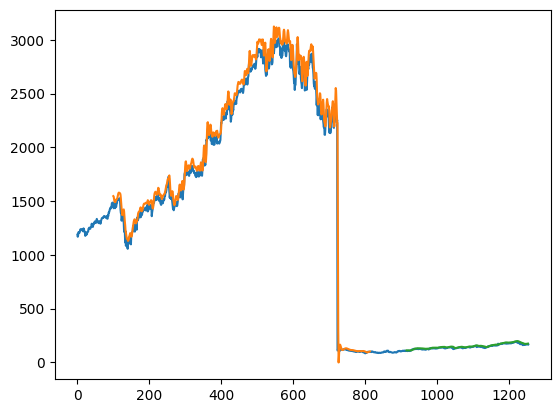

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.024038707608105937,
 0.024789384069963043,
 0.025471817217105865,
 0.025308033261791592,
 0.026376041137070105,
 0.025830094619355846,
 0.024854215218941617,
 0.024741613749663046,
 0.02504188433440589,
 0.025239789947077308,
 0.02464607310906305,
 0.0254069860681273,
 0.026079182718062973,
 0.026481818274877247,
 0.0254069860681273,
 0.030777734936141315,
 0.028802090975162845,
 0.02768972494532004,
 0.028007056358741452,
 0.028993172256362835,
 0.029174017040355684,
 0.029460638962155675,
 0.03053547116890561,
 0.029914457005005644,
 0.030057767965905643,
 0.029617598585998512,
 0.029825740695877078,
 0.030177193766655636,
 0.03084256608511988,
 0.03137145177415558,
 0.03200611460099839,
 0.032405337992076955,
 0.032773851891534075,
 0.032248378368234104,
 0.03124520164193415,
 0.031678546690369846,
 0.032255202699705526,
 0.032043648424091256,
 0.030733376781577035,
 0.0308698634110056,
 0.031026823034848442,
 0.03126908680208415,
 0.03193104695481269,
 0.03236780416898409,
 0.03

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.03117864]
101
1 day input [0.02478938 0.02547182 0.02530803 0.02637604 0.02583009 0.02485422
 0.02474161 0.02504188 0.02523979 0.02464607 0.02540699 0.02607918
 0.02648182 0.02540699 0.03077773 0.02880209 0.02768972 0.02800706
 0.02899317 0.02917402 0.02946064 0.03053547 0.02991446 0.03005777
 0.0296176  0.02982574 0.03017719 0.03084257 0.03137145 0.03200611
 0.03240534 0.03277385 0.03224838 0.0312452  0.03167855 0.0322552
 0.03204365 0.03073338 0.03086986 0.03102682 0.03126909 0.03193105
 0.0323678  0.03154888 0.03178091 0.03231321 0.03278068 0.03181845
 0.03237463 0.03251453 0.03171949 0.03214943 0.03301953 0.03320037
 0.0348348  0.03476314 0.03527156 0.03409777 0.03446287 0.03518625
 0.0354524  0.03701176 0.03650676 0.03649311 0.03725061 0.03542169
 0.03524426 0.03572538 0.0348075  0.0338248  0.03266466 0.03272267
 0.03407389 0.03415919 0.03100976 0.02923202 0.02906824 0.02990422
 0.03015331 0.03059348 0.03035463 0.0289727  0.02632486 0.02629074
 0.02636239 0.02741675 0.02794564 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)


1256

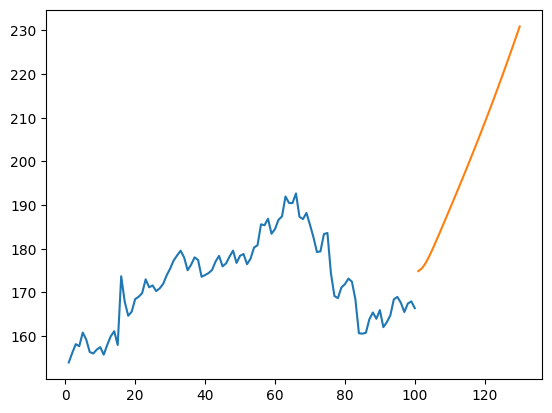

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

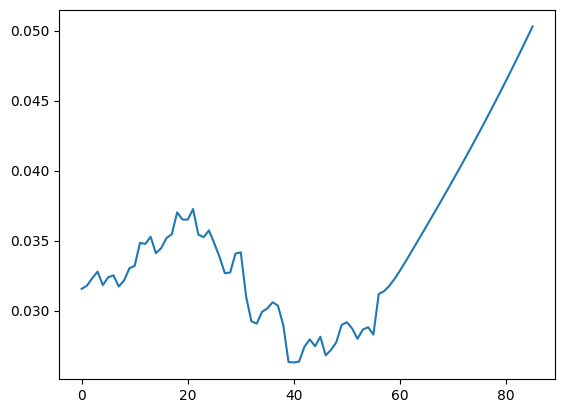

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

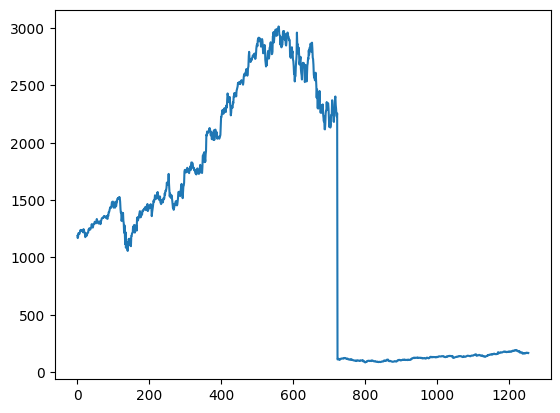

In [ ]:
plt.plot(df3)